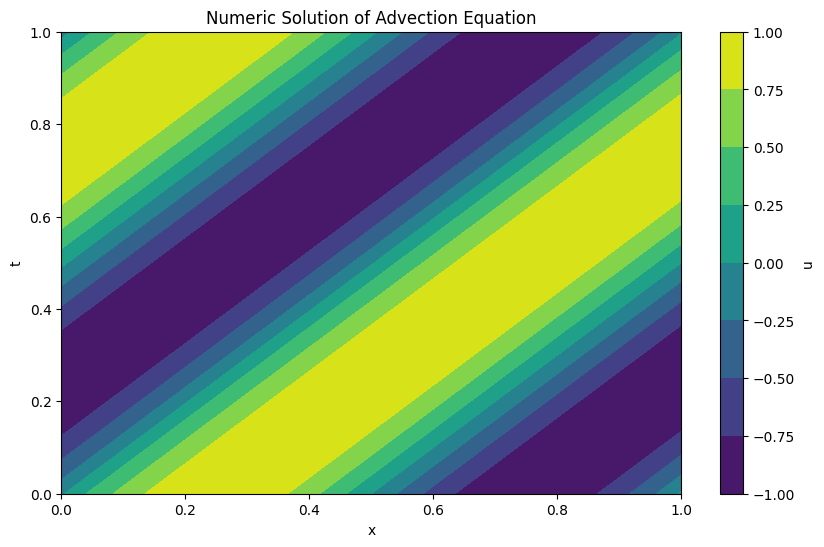

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем параметры
L = 1.0  # Длина пространственного интервала
T = 1.0  # Общее время
Nx = 100  # Количество узлов по пространству
Nt = 100  # Количество временных шагов
c = 1.0   # Скорость переноса

dx = L / Nx  # Шаг по пространству
dt = T / Nt  # Шаг по времени

# Создаем массивы для хранения значений u(x, t)
u = np.zeros((Nx+1, Nt+1))

# Задаем начальное условие
def initial_condition(x):
    return np.sin(2 * np.pi * x)

# Задаем граничные условия (периодические)
def boundary_condition(u, t):
    u[0, t] = u[-2, t]  # Левая граница
    u[-1, t] = u[1, t]  # Правая граница

# Инициализируем начальное условие
for i in range(Nx+1):
    u[i, 0] = initial_condition(i * dx)

# Выполняем численное интегрирование
for t in range(1, Nt+1):
    boundary_condition(u, t-1)
    for i in range(1, Nx):
        u[i, t] = u[i, t-1] - c * dt / dx * (u[i, t-1] - u[i-1, t-1])

# Визуализируем результат
x_values = np.linspace(0, L, Nx+1)
t_values = np.linspace(0, T, Nt+1)
X, T = np.meshgrid(x_values, t_values)
plt.figure(figsize=(10, 6))
plt.contourf(X, T, u.T, cmap='viridis')
plt.colorbar(label='u')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Numeric Solution of Advection Equation')
plt.show()
